In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
#Load Datasets

In [5]:
train=pd.read_csv("tran.csv")
test=pd.read_csv("test.csv")

In [6]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
# loan Status counts and bar representation

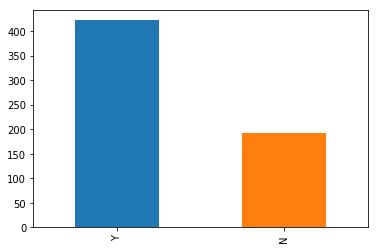

In [9]:
train["Loan_Status"].value_counts()
train["Loan_Status"].value_counts().plot.bar()

In [10]:
# Indepedent Categorical Attribues Representation

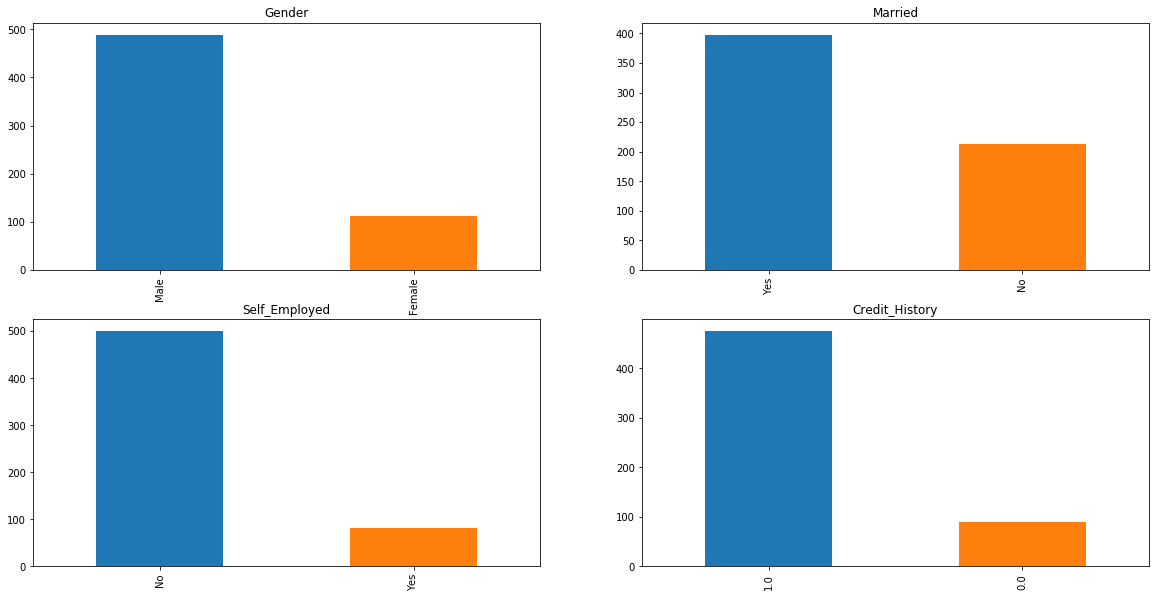

In [11]:
plt.figure(1)
plt.subplot(221) 
train["Gender"].value_counts().plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222) 
train["Married"].value_counts().plot.bar(title="Married")
plt.subplot(223) 
train["Self_Employed"].value_counts().plot.bar(title="Self_Employed")
plt.subplot(224) 
train["Credit_History"].value_counts().plot.bar(title="Credit_History")

In [12]:
#Categorical Independent Variable vs Target Variable

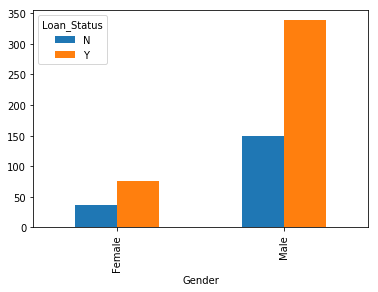

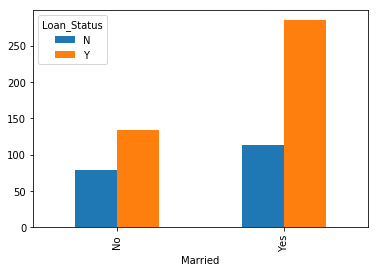

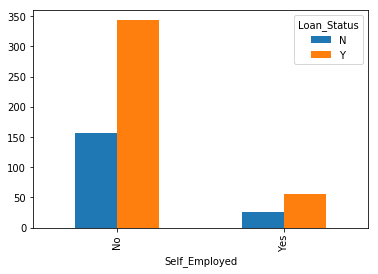

In [13]:
gender=pd.crosstab(train["Gender"],train["Loan_Status"]).plot.bar()
married=pd.crosstab(train["Married"],train["Loan_Status"]).plot.bar()
self_employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"]).plot.bar()

In [ ]:
#missing Values

In [16]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)

#Replacing 3+ Depedents to only 3 
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

In [32]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [ ]:
#let's Drop columns that we don't need

In [35]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [49]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]
X=pd.get_dummies(x)

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
#logistic Model

In [57]:
model=LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
ped=model.predict(x_test)
accuracy_score(y_test,ped)

0.8108108108108109